# Intro
Ce classeur est une copie du classeur LinearRegression dans lequel on adapte notre modèle pour fonctionner avec des modèles d'ordre supérieurs.
Le but est de montrer que la méthodologie et les fonctions mises en oeuvres sont identiques et que seules les données manipulées changent

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Polynome d'ordre 2
## 1. Dataset

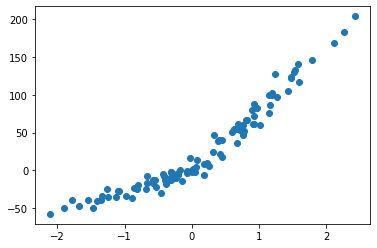

In [2]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y + abs(y/2)   # On modifie les y générés pour qu'il ait une allure de fonction polynomiale
plt.scatter(x, y)

In [3]:
print(x.shape)
print(y.shape)
y = y.reshape(y.shape[0], 1)   # Besoin de redimensionner le vecteur y. C'est lié à la méthode make_regression
print(y.shape)

(100, 1)
(100,)
(100, 1)


In [4]:
# Matrice X
X = np.hstack((x, np.ones(x.shape)))   # On rajoute la colonne de biais
X = np.hstack((x**2, X))    # X prend alors 3 colonnes : x², x et 1
print(X.shape)

(100, 3)


In [5]:
# Vecteur theta
theta = np.random.randn(3, 1)    # Theta a maintenant 3 coefficients : a, b et c pour une équation de la forme ax²+bx+c
print(theta)

[[ 1.67626053]
 [-0.12568279]
 [-0.23879691]]


## 2. Modèle

In [6]:
def model(X, theta):
    return X.dot(theta)

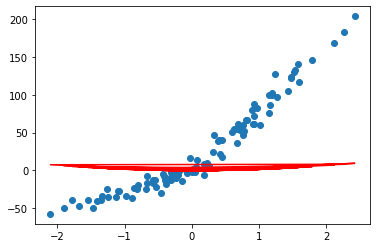

In [7]:
model(X, theta)
plt.plot(x, model(X, theta), c='r')
plt.scatter(x, y)

## 3. Fonction coût

In [8]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [9]:
cost_function(X, y, theta)

1987.6095090085091

## Descente de gradient

In [10]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [11]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

## Entrainement du modèle

In [12]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)
print(theta_final)

[[13.09278789]
 [53.60195076]
 [ 8.0472491 ]]


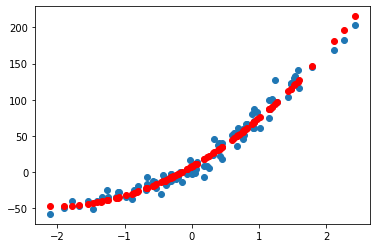

In [13]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.scatter(x[:,0], predictions, c='r')

## Learning curve

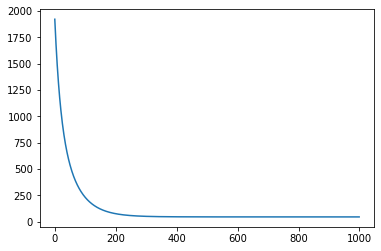

In [14]:
plt.plot(cost_history)


## Coefficient de determination
Permet de déterminer la performance du modèle
$$
R^2 = 1 - \frac {\sum (y - f(x))^2}{\sum (y - \bar{y})^2}
$$

In [15]:
def coeff_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return (1 - u/v)

In [16]:
coeff_determination(y, predictions)

0.9735600614171145

# Dataset à 2 features

## 1. Dataset

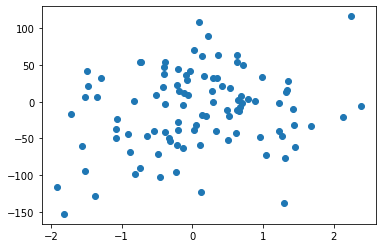

In [17]:
# n_features = 2 --> donc x est maintenant une matrice de 2 colonnes
x, y = make_regression(n_samples=100, n_features=2, noise=10)
# Comme x est une matrice, on ne peut représenter qu'une seule des 2 dimensions sur un graph 2D
plt.scatter(x[:,0], y)

In [18]:
print(x.shape)
print(y.shape)
y = y.reshape(y.shape[0], 1)   # Besoin de redimensionner le vecteur y. C'est lié à la méthode make_regression
print(y.shape)

(100, 2)
(100,)
(100, 1)


In [19]:
# Matrice X
X = np.hstack((x, np.ones((x.shape[0], 1))))   # On rajoute la colonne de biais.
# On ne prend que la première dimension de x (le nombre d'éléments)
# et on force à 1 colonne
# Si on avait laissé x.shape, on aurait eu 2 colonnes
print(X.shape)

(100, 3)


In [20]:
# Vecteur theta
theta = np.random.randn(3, 1)    # Theta a maintenant 3 coefficients : a, b et c pour une équation de la forme ax²+bx+c
print(theta)

[[-1.00546502]
 [ 0.88664792]
 [-1.12581471]]


## 2. Modèle

In [21]:
def model(X, theta):
    return X.dot(theta)

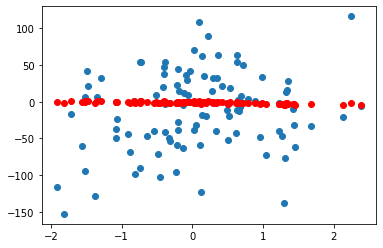

In [22]:
model(X, theta)
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], model(X, theta), c='r')

## 3. Fonction coût

In [23]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [24]:
cost_function(X, y, theta)

1434.5004426499333

## Descente de gradient

In [25]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [26]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

## Entrainement du modèle

In [27]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)
print(theta_final)

[[1.20162373e+01]
 [4.91830174e+01]
 [3.60658286e-02]]


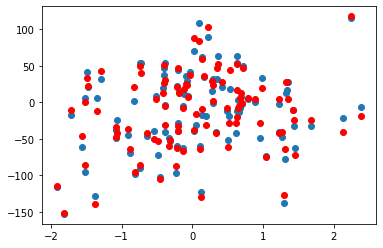

In [28]:
predictions = model(X, theta_final)
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], predictions, c='r')

## Learning curve

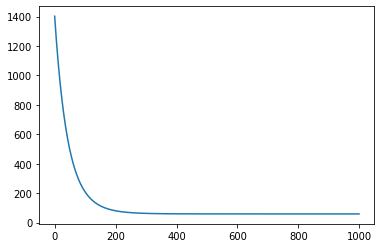

In [29]:
plt.plot(cost_history)


## Coefficient de determination
Permet de déterminer la performance du modèle
$$
R^2 = 1 - \frac {\sum (y - f(x))^2}{\sum (y - \bar{y})^2}
$$

In [30]:
def coeff_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return (1 - u/v)

In [31]:
coeff_determination(y, predictions)

0.9581857956043502

## Visualisation en 3D
Un modèle à 2 features est plus simple à visualiser en 3D. Pour plus de features, cela devient difficile à représenter graphiquement.

<IPython.core.display.Javascript object>


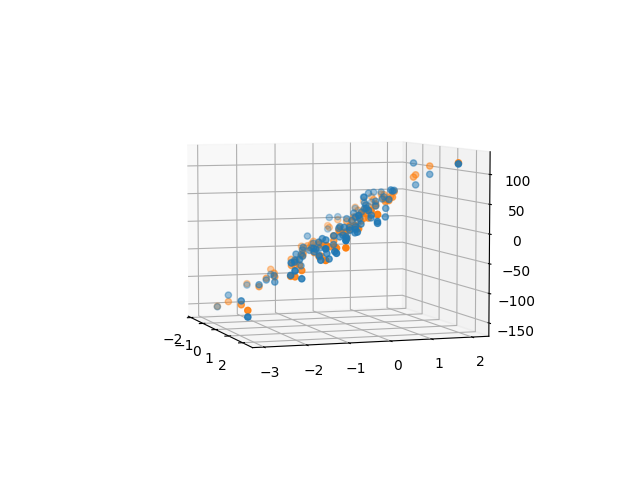

In [32]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)